<a href="https://colab.research.google.com/github/devi777/News-Virality-MultiClass-Classification/blob/master/1_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bipolar Factory | Machine Learning

## Introduction to Problem Statement

So, I chose the problem statement - "Crawl news & information websites & anticipate the likelihood of its virality." because I am familiar with it and believe that I will do better on this option rather than other one, since I have lost touch with creating databases for a while. So, let's get on with it.

So here is what I deduced. First, The problem statement targets on to find how likely is the news/info website to be viral. This implies that a the model I am going to build and train is going to be a Classification problem. And I am going to classify the websites in three categories - High, Medium, Low (0,1 and 2 respectively). 

Second, The internship requires me to have skills in Tensorflow, Feature engineering, Data visualization and Model training. So, I will make 3 notebooks - one where I will apply ANN (Artificial Neural Networks) to the training set, second where I will apply Dimensionality Reduction using feature extraction and extraction to the training set and then visualize it using matplotlib. Third, to try other classification models aswell, such as SVM, Kernel SVM, Decision Tree, Random Forest etc., to see if they hold a better solution to the given statement.

So that's the overview. Now, I tried to manually find some features (parameters) on the basis of which we are going to predict whether the website comes under high, medium, or low in with respect to virality.

Here are the features:

1.  VPM (Visitors per month)    - No. of times the website is visited by users per month          
4.  KOB (keyword opportunity    - Customized keyword recommendation the site could target to drive more traffic
         breakdown) 
2.  DPPV                        - Daily page per views per visitor (1st site metric)         
5.  DTS (dailty time on site)   - Avg. time (in mins) a visitor spends time on the website each day (2nd site metric)
6.  BR (Bounce Rate %)          - Percentage of visits to the site that consist of a single pageview (3rd site metric)  
3.  TP (traffic %)              - Percentage of organic search referrals to this website
7.  TR (Traffic Ratio)          - Website Search Traffic / Competitor Average Search Traffic 
8.  PB (Political Biasness)     - Whether the website tends to convey/show preference to a political group/community from their                                    articles
9.  PPD (Posts per day)         - No. of posts uploaded on website every day
10.  AR (Alexa Rank)             - an American traffic analysis company that ranks news websites
11. SEM (social engagement)     - Social media engagement measures public shares, likes and comments for a website social                                          media efforts. 
12. TFPM (twitter_followers     - let's see how much no. of a social media following matters , and twitter is a famous                       per million)          media platform to share news/info.
13. TGT (Target)                - The categorised feature which predicts the virality of the website (0/1/2) based on the other                                   12 columns.

0. - High
1. - Medium
2. - Low

So, these are the features that I believe are good enough to predict whether the virality of the website. there were other features I wanted to put up, such as:
- content quality 
- recency (how fast they uploaded the news/info on their page when it occured) 
- authenticity (whether they have uploaded fake information or not)

but I didn't have the sources and didn't get much from the research on these parameters on the web. So, let's proceed.

Now, As I tried to search and was unsuccessful in finding any dataset familiar to this target. I will have to manually create my the training and test set and build my classifier on it. 
Since, the no. of training examples will be low, the classifier must have low bias (high variance) so that it performs better when the no. of training examples are increased.

So after a lot of research and effort I have finally created my dataset of 17 examples. It is small, but I had to check out a lot of website for every feature of every training example. So, let's see how well it predicts.

## Data Visualization 

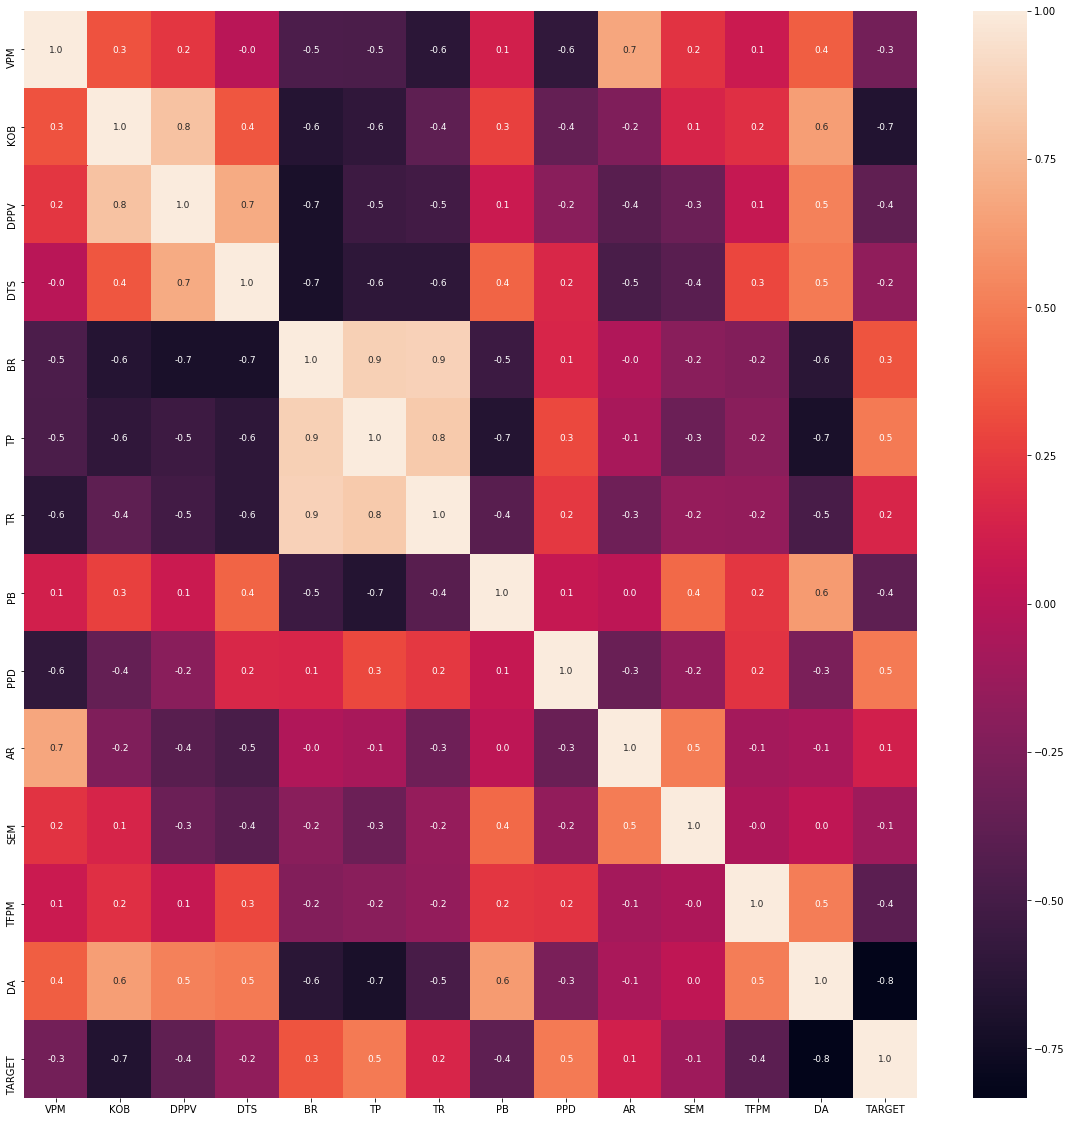

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True,annot_kws={"size":9},fmt='.1f')
plt.show()

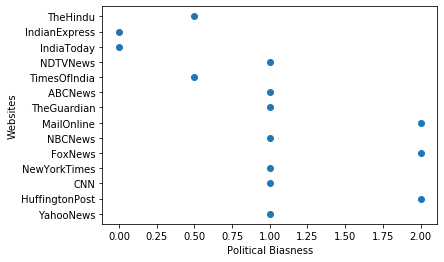

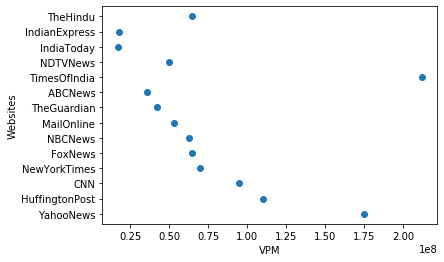

In [0]:
plt.scatter(dataset.iloc[:,8].values,dataset.iloc[:,0].values,)
plt.xlabel('Political Biasness')
plt.ylabel('Websites')
plt.show()
plt.scatter(dataset.iloc[:,1].values,dataset.iloc[:,0].values,)
plt.xlabel('VPM')
plt.ylabel('Websites')
plt.show()

So, most of the websites tend to lean to some level of political biasness, either left or right. Only 2 of 14 websites don't show any political biasness. 
Courtesy: Web

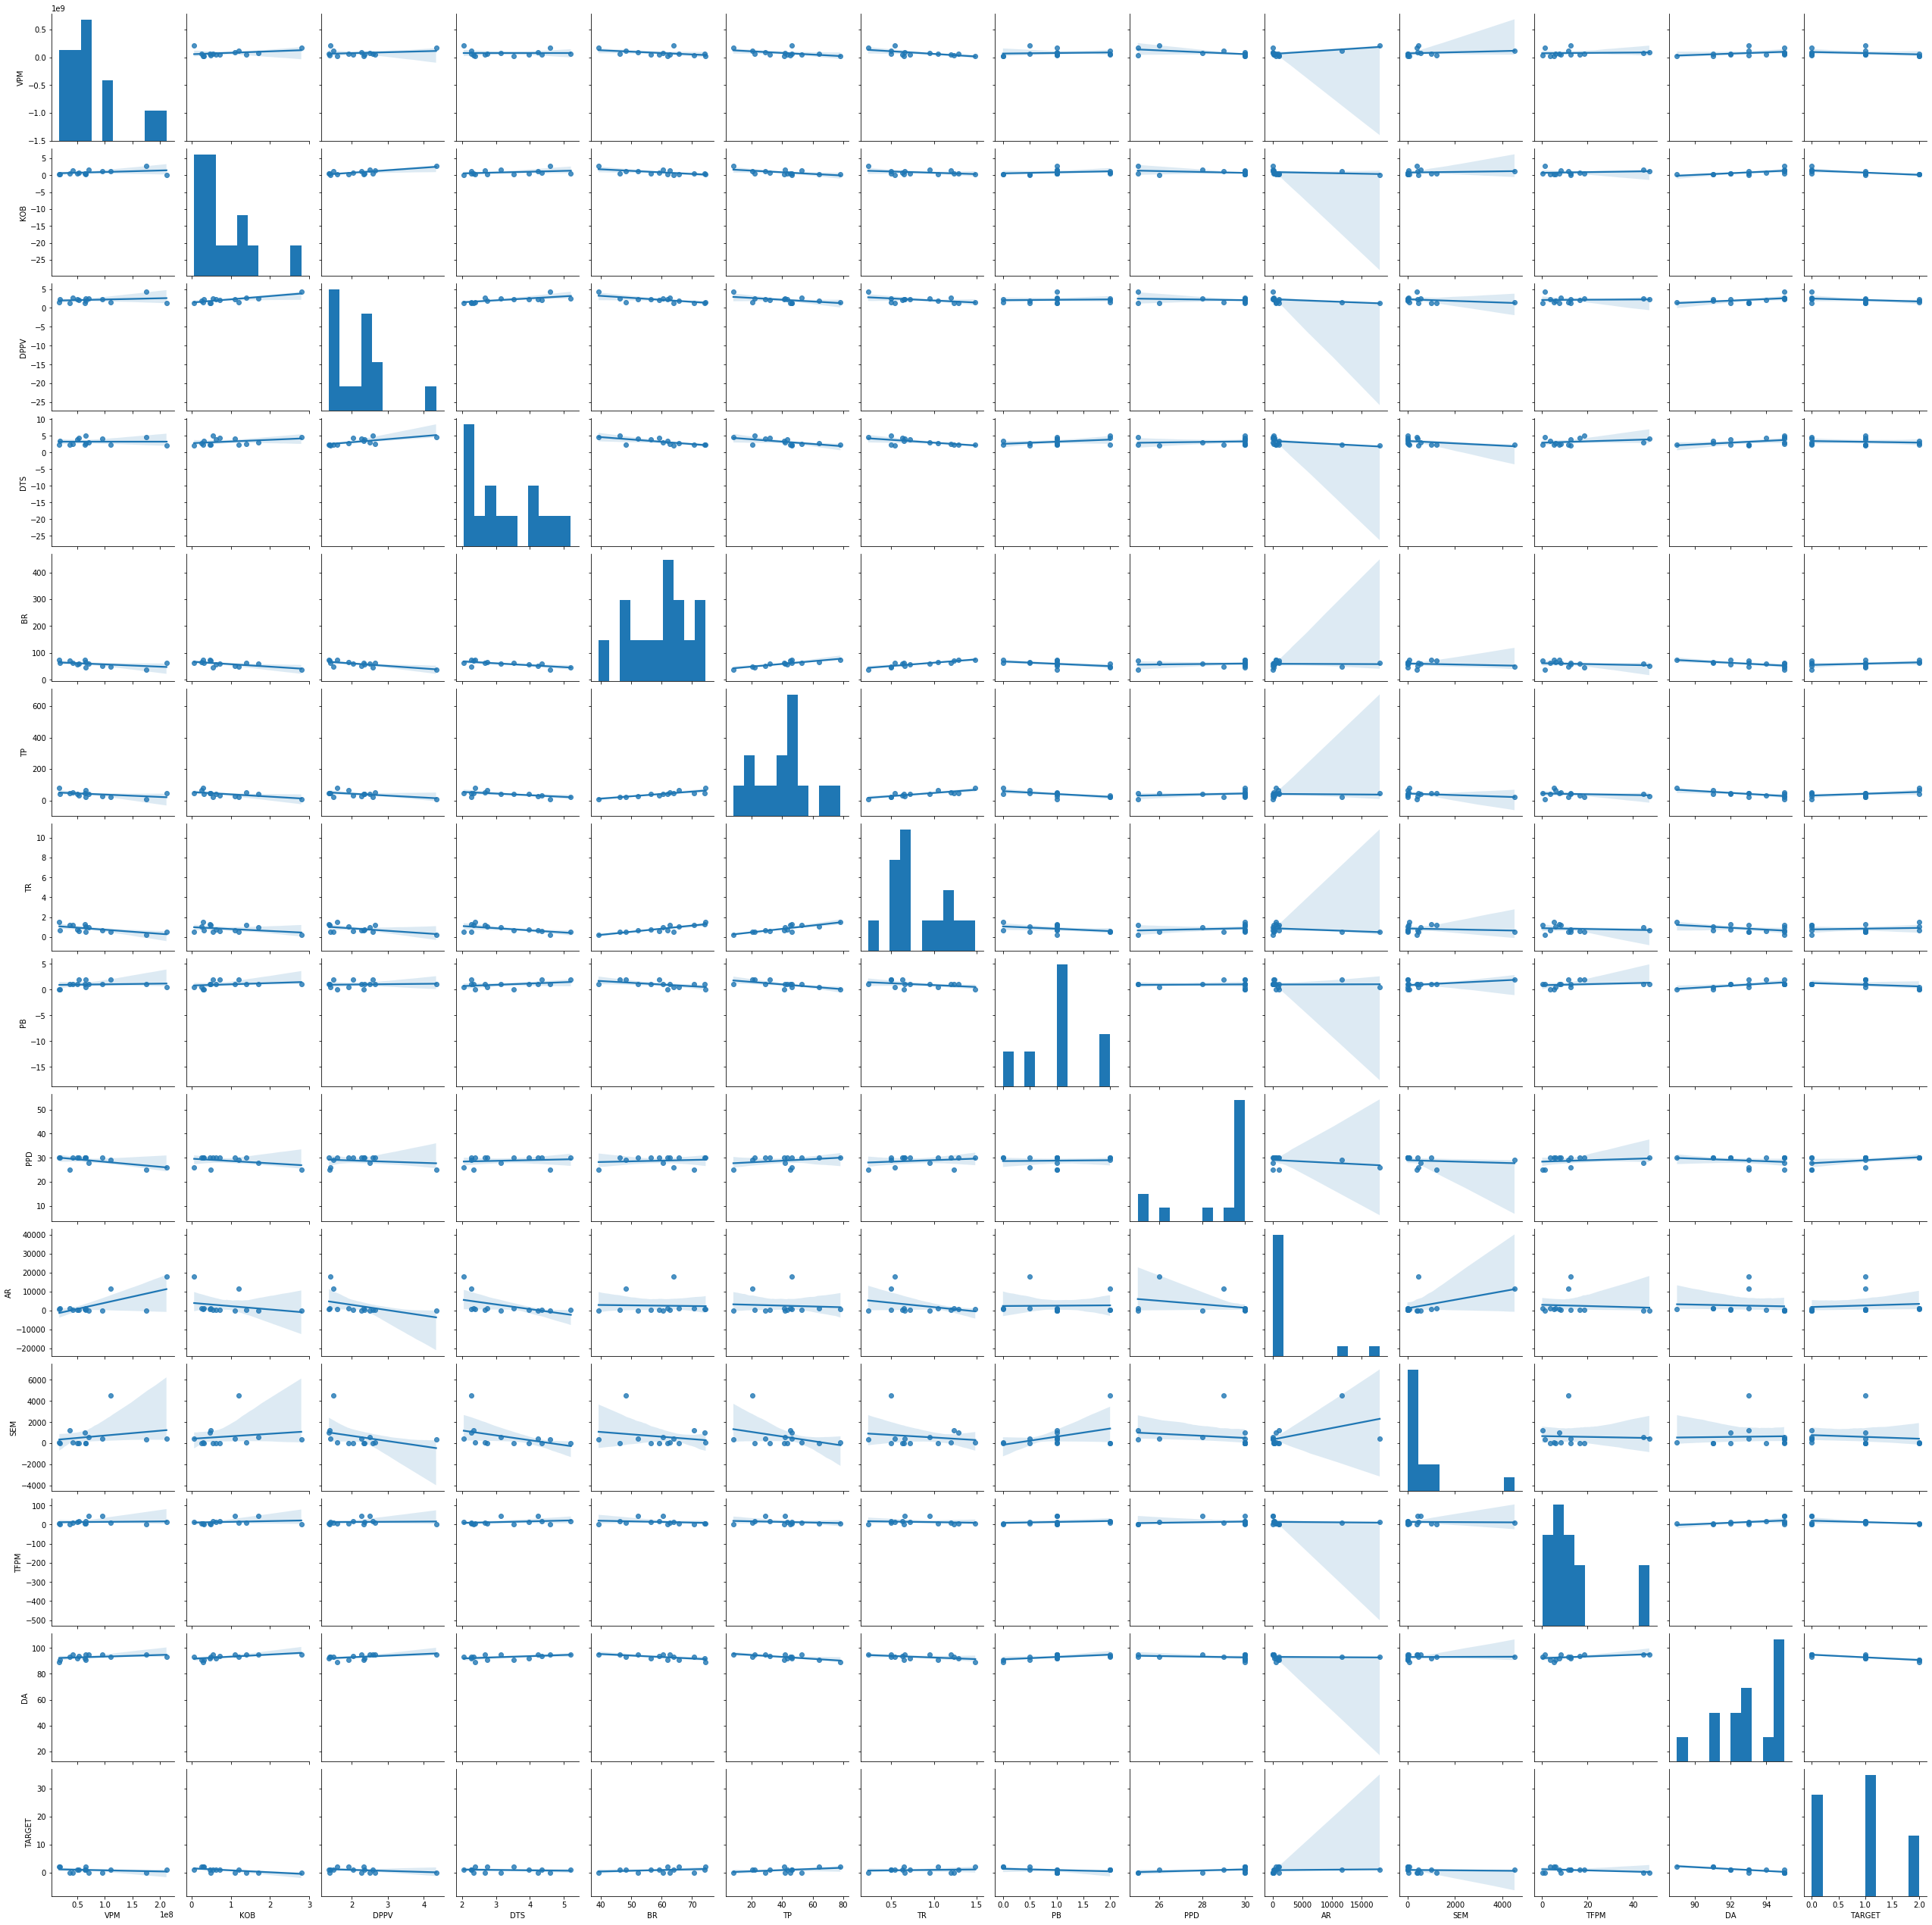

In [0]:
#double tap to zoom
sns.pairplot(dataset, kind="reg")
plt.show()

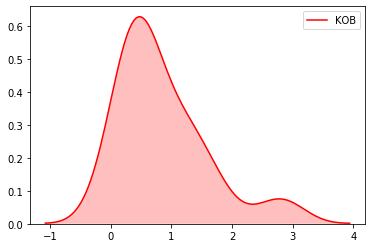

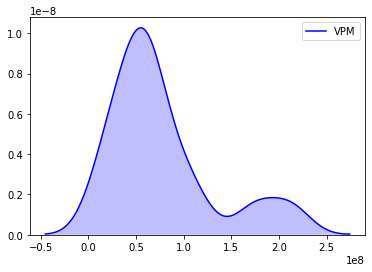

In [0]:
# plot of 2 variables
p1=sns.kdeplot(dataset['KOB'], shade=True, color="r")
plt.show()
p1=sns.kdeplot(dataset['VPM'], shade=True, color="b")

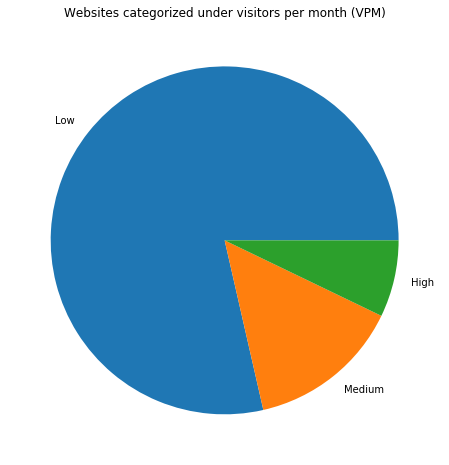

In [0]:
low_views = dataset[(dataset.VPM>=0)&(dataset.VPM<=100000000)]
medium_views = dataset[(dataset.VPM>=100000000)&(dataset.VPM<200000000)]
high_views = dataset[(dataset.VPM>=200000000)]
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(low_views), len(medium_views), len(high_views)], labels=['Low', 'Medium', 'High'])
plt.title('Websites categorized under visitors per month (VPM)')
plt.show()

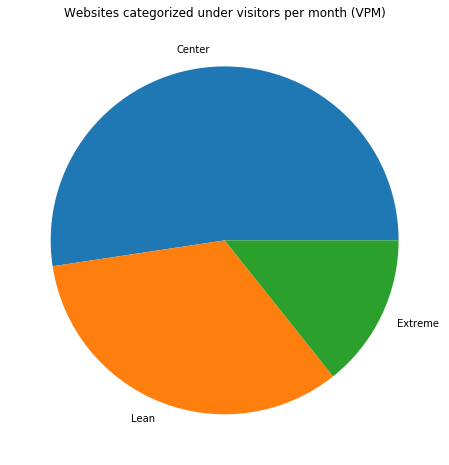

In [0]:
low_views = dataset[(dataset.PB>=0)&(dataset.PB<=1)]
medium_views = dataset[(dataset.PB>=1)&(dataset.PB<2)]
high_views = dataset[(dataset.PB>=2)]
colors = ['black','white', 'yellow']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(low_views), len(medium_views), len(high_views)], labels=['Center', 'Lean', 'Extreme'])
plt.title('Websites categorized under visitors per month (VPM)')
plt.show()

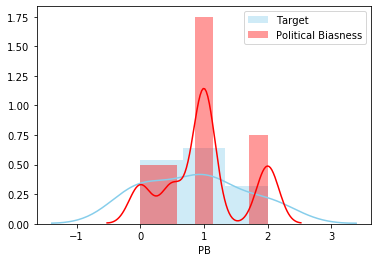

In [0]:
sns.distplot( dataset["TARGET"] , color="skyblue", label="Target")
sns.distplot( dataset["PB"] , color="red", label="Political Biasness")
plt.legend()

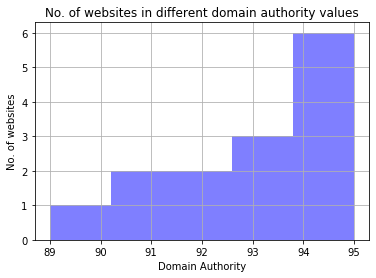

In [0]:
plt.hist(dataset.DA.values, 5, facecolor='blue', alpha=0.5)
plt.xlabel('Domain Authority')
plt.ylabel('No. of websites')
plt.title('No. of websites in different domain authority values')
plt.grid(True)
plt.show()

## Pre-processing Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Importing the dataset
dataset = pd.read_csv('News3.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [0]:
dataset

,NAME,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
0,YahooNews,175000000,2.800,4.34,4.600,39.2,8.3,0.228022,1.0,25,11,395,1.10,95,0
1,HuffingtonPost,110000000,1.200,1.50,2.260,48.1,20.8,0.500000,2.0,29,11655,4500,11.40,93,1
2,CNN,95000000,1.100,2.28,4.230,52.3,29.1,0.659864,1.0,30,72,417,47.20,95,0
3,NewYorkTimes,70000000,1.700,2.50,3.150,60.6,41.9,0.945824,1.0,28,77,555,44.70,95,0
4,FoxNews,65000000,0.550,2.59,5.210,46.3,22.2,0.500000,2.0,30,227,15,18.50,95,1
5,NBCNews,63000000,0.460,1.37,2.260,74.3,46.6,1.290859,1.0,30,507,1000,7.50,92,1
6,MailOnline,53000000,0.710,2.04,4.350,59.1,32.0,0.631164,2.0,30,271,16,16.40,94,1
7,TheGuardian,42000000,1.400,2.64,2.683,62.7,52.7,1.203196,1.0,30,119,50,8.20,95,0
8,ABCNews,36000000,0.482,1.39,2.330,70.8,45.2,1.231608,1.0,25,1047,1230,0.05,93,0
9,TimesOfIndia,212000000,0.063,1.40,2.050,64.1,46.2,0.540351,0.5,26,18024,467,12.70,93,1


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    14 non-null     object 
 1   VPM     14 non-null     int64  
 2   KOB     14 non-null     float64
 3   DPPV    14 non-null     float64
 4   DTS     14 non-null     float64
 5   BR      14 non-null     float64
 6   TP      14 non-null     float64
 7   TR      14 non-null     float64
 8   PB      14 non-null     float64
 9   PPD     14 non-null     int64  
 10  AR      14 non-null     int64  
 11  SEM     14 non-null     int64  
 12  TFPM    14 non-null     float64
 13  DA      14 non-null     int64  
 14  TARGET  14 non-null     int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 1.8+ KB


In [0]:
dataset.describe()

,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
count,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.650000e+07,0.853357,2.160714,3.268786,59.750000,40.871429,0.830326,1.000000,28.785714,2500.857143,623.857143,13.939286,93.071429,0.857143
std,5.620259e+07,0.735229,0.784567,1.038707,10.488877,17.982189,0.370527,0.650444,1.968153,5387.031405,1182.507496,14.591728,1.899971,0.770329
min,1.700000e+07,0.063000,1.370000,2.050000,39.200000,8.300000,0.228022,0.000000,25.000000,11.000000,1.000000,0.050000,89.000000,0.000000
25%,4.400000e+07,0.354250,1.522500,2.342500,53.350000,29.825000,0.563054,0.625000,28.250000,146.000000,15.250000,5.475000,92.000000,0.000000
50%,6.400000e+07,0.580000,2.160000,2.950000,61.350000,42.600000,0.687193,1.000000,30.000000,432.500000,232.500000,9.800000,93.000000,1.000000
75%,8.875000e+07,1.175000,2.465000,4.167500,65.375000,46.500000,1.164186,1.000000,30.000000,1029.500000,533.000000,15.475000,95.000000,1.000000
max,2.120000e+08,2.800000,4.340000,5.210000,74.600000,78.200000,1.486692,2.000000,30.000000,18024.000000,4500.000000,47.200000,95.000000,2.000000


In [0]:
dataset.corr()

,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
VPM,1.000000,0.337333,0.233370,-0.000558,-0.463057,-0.472029,-0.620931,0.114680,-0.592838,0.674163,0.215951,0.083145,0.377112,-0.293162
KOB,0.337333,1.000000,0.800055,0.353895,-0.647895,-0.597341,-0.385706,0.270713,-0.359084,-0.239022,0.146612,0.198047,0.635612,-0.665955
DPPV,0.233370,0.800055,1.000000,0.692670,-0.705903,-0.537671,-0.516674,0.082151,-0.200153,-0.413857,-0.329710,0.057336,0.515483,-0.380377
DTS,-0.000558,0.353895,0.692670,1.000000,-0.704595,-0.606202,-0.606712,0.399633,0.156506,-0.480456,-0.403781,0.293479,0.487503,-0.172606
BR,-0.463057,-0.647895,-0.705903,-0.704595,1.000000,0.867748,0.873657,-0.542893,0.149235,-0.035740,-0.198725,-0.229764,-0.630907,0.346540
TP,-0.472029,-0.597341,-0.537671,-0.606202,0.867748,1.000000,0.840371,-0.656349,0.299754,-0.072517,-0.329730,-0.201176,-0.708250,0.491135
TR,-0.620931,-0.385706,-0.516674,-0.606712,0.873657,0.840371,1.000000,-0.413201,0.238848,-0.315178,-0.150734,-0.158875,-0.487598,0.153966
PB,0.114680,0.270713,0.082151,0.399633,-0.542893,-0.656349,-0.413201,1.000000,0.060088,0.021635,0.422042,0.228149,0.622444,-0.383805
PPD,-0.592838,-0.359084,-0.200153,0.156506,0.149235,0.299754,0.238848,0.060088,1.000000,-0.338675,-0.165174,0.213256,-0.263012,0.485622
AR,0.674163,-0.239022,-0.413857,-0.480456,-0.035740,-0.072517,-0.315178,0.021635,-0.338675,1.000000,0.494612,-0.086816,-0.063919,0.117146


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories = 'auto')
y = np.reshape(y,(-1,1))
y = onehotencoder.fit_transform(y).toarray()
print(y)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 4/13, random_state = 0)

So, here I have split the dataset with a 69-31 split, 10 training examples of 4 test set examples. Let's apply feature scaling too them.

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now since I have pre-processed the data. Let's build our model and fit on the training set, using Neural Networks.

## Building ANN

So, apparently tensorflow library wasn't coorectly installed by pip. It took me hours to install tensorflow in the correct environemnt with all other packages installed as well. Finally, it worked. Let's start bulding now.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 3, activation = 'softmax'))

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  """
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

So here I have made 4 layers. The inpur layer with 12 variables, 2 hidden layers with 6 variables each, and then the output layer with 3 variables. Let's compile the classifier now, i.e., apply stochastic gradient descent to this whole network.

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m,precision_m, recall_m])

In [0]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 5, nb_epoch = 50, validation_split = 0.5)

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 4 samples, validate on 5 samples
Epoch 1/50
4/4 [==============================] - 1s 183ms/step - loss: 0.6365 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6365 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6365 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6365 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6667 - 

Epoch 30/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6364 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 31/50
4/4 [==============================] - 0s 748us/step - loss: 0.6305 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6364 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 32/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6364 - val_accuracy: 0.6667 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 33/50
4/4 [==============================] - 0s 748us/step - loss: 0.6301 - accuracy: 0.6667 - f1_m: 0.0000e+00 - precision_m: 0.00

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[[0.30911595 0.36125562 0.3296285 ]
 [0.31012088 0.36077824 0.32910088]
 [0.30955362 0.36105177 0.32939464]
 [0.30839112 0.36159846 0.33001038]
 [0.30904254 0.3612983  0.32965916]]


In [0]:
for i in range(len(y_pred)):
    for j in range(3):
        if y_pred[i,j] == max(y_pred[i,:]):
            y_pred[i,j] = 1.0
        else:
            y_pred[i,j] = 0.0

In [0]:
print(y_pred)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [0]:
loss, accuracy, f1_score, precision, recall = classifier.evaluate(X, y, verbose=0)

In [0]:
print(accuracy)

0.6666666269302368


In [0]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
y_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [0]:

from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2']
conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_test[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 0:
[[3 0]
 [2 0]]
Confusion matrix for label 1:
[[0 3]
 [0 2]]
Confusion matrix for label 2:
[[4 0]
 [1 0]]


In [0]:
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(y_test, y_pred)
print(cm)
print( skm.classification_report(y_test,y_pred))

[[[3 0]
  [2 0]]

 [[0 3]
  [0 2]]

 [[4 0]
  [1 0]]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         1

   micro avg       0.40      0.40      0.40         5
   macro avg       0.13      0.33      0.19         5
weighted avg       0.16      0.40      0.23         5
 samples avg       0.40      0.40      0.40         5



C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Well, so we succesfully trained the model on the dataset, but with a highly low accuracy. That's because we randomly initialized our target y for each training exmple y, hence our data isn't able to predict the virality of website. Let's try dimensionality reduction in the next notebook.